In [1]:
import gdal as gdal
import glob as glob

In [2]:
wfiles = glob.glob('./data/basin_index_rasters/HW/*.tif')

In [3]:
watersheds = []
for fl in wfiles:
    watersheds.append(int(fl.split('/')[-1].split('.')[0].split('_')[-1]))

In [4]:
watersheds

[10180001,
 10180010,
 10190001,
 10190002,
 10190004,
 10190005,
 10190006,
 10190007,
 11020001,
 14010001,
 14010002,
 14010003,
 14010004,
 14020003]

In [5]:
# generate a list containing all the cells and cell fractions for all the watersheds
cells = []
percents = []

for fl in wfiles:
    perc = []
    ds = gdal.Open(fl)
    rast = np.array(ds.GetRasterBand(1).ReadAsArray())
    vals = np.unique(rast[rast!=-9999]) # grab unique value not equal to the no data value
    
    for val in vals:
        num = len(rast[rast==val]) # grab the number of values equal to the value
        cent = num/100. # divide by 100 to get the percent
        perc.append(cent)
        
    cells.append(vals)
    percents.append(perc)
    print np.sum(perc)

229.3
362.18
258.1
294.4
91.33
155.27
133.15
303.89
490.3
466.13
109.24
155.48
232.59
176.49


In [6]:
np.max(perc)

1.0

(0.0, 180.0, 0.0, 250.0)

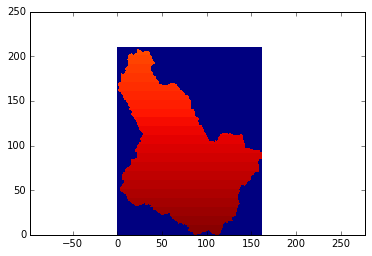

In [8]:
plt.pcolormesh(rast,vmin=0)
plt.axis('equal')

In [9]:
print len(cells[-1])
print len(percents[-1])


215
215


In [10]:
watersheds

[10180001,
 10180010,
 10190001,
 10190002,
 10190004,
 10190005,
 10190006,
 10190007,
 11020001,
 14010001,
 14010002,
 14010003,
 14010004,
 14020003]

In [11]:
cells = np.array(cells)
percents = np.array(percents)

In [12]:
np.savez('./data/HW_index_cells_by_basin.npz',watersheds = watersheds,cells = cells,percents = percents)

In [13]:
!ls -lth ./data/

total 1999528
-rwx------  1 barnhatb  staff    70K Aug  8 11:42 HW_index_cells_by_basin.npz
drwx------  1 barnhatb  staff    16K Aug  8 11:24 basin_index_rasters
-rwx------  1 barnhatb  staff    64M Aug  8 11:23 WRF_headwaters_index_sm.tif
-rwx------  1 barnhatb  staff   653K Aug  8 11:10 WRF_headwaters_index.tif
-rwx------  1 barnhatb  staff   4.7M Aug  8 11:08 wrf_headwaters_index.dbf
-rwx------  1 barnhatb  staff   2.2M Aug  8 11:08 wrf_headwaters_index.shp
-rwx------  1 barnhatb  staff   651K Aug  8 11:08 wrf_headwaters_index.shx
-rwx------  1 barnhatb  staff     5B Aug  8 11:08 wrf_headwaters_index.cpg
-rwx------  1 barnhatb  staff   436B Aug  8 11:08 wrf_headwaters_index.prj
-rwx------  1 barnhatb  staff   417B Aug  8 11:08 wrf_headwaters_index.qpj
-rwx------  1 barnhatb  staff   2.8M Aug  8 10:50 wrf_headwaters_domain_xy_index.csv
-rwx------  1 barnhatb  staff   3.5K Aug  5 15:35 wrf_index_raster.tif.aux.xml
-rwx------  1 barnhatb  staff   466K May  6 13:22 precip_wy2013.npz
-rw